# Understanding the Dataset
- Introduction to the spatial gene expression dataset
- Download the data
- How to load the dataset
- Basic operations to explore the dataset

### Download data files
Data file is large (>1GB) so it is not practical to push it to Github and track it via git. 
Manually download this file and place it in somwhere on your desktop. 
I placed mine in the Data folder within the repo. 

In [1]:
URL='https://drive.google.com/file/d/1NMxoXLC2trb4belnlVABqkgd7KRi-KCm/view?usp=drive_link'

The data is organized in a special data format called Anndata 
you will need to install anndata package (conda install -c bioconda anndata)

Let me introduce you to Anndata

In [1]:
from IPython.display import Image
Image(url="https://raw.githubusercontent.com/scverse/anndata/main/docs/_static/img/anndata_schema.svg")

Ok, let's load the data

install anndata from conda-forge: 

conda install -c conda-forge anndata

In [2]:
import anndata
adata = anndata.read_h5ad('../Data/Brain_AllenData.h5ad')


In [3]:
print(adata)

AnnData object with n_obs × n_vars = 978067 × 550
    obs: 'brain_section_label', 'Slice', 'cluster_alias', 'average_correlation_score', 'matrix_label', 'donor_label', 'low_quality_mapping', 'donor_genotype', 'donor_sex', 'x', 'y', 'z', 'node_size', 'neurotransmitter', 'division', 'class', 'subclass', 'supertype', 'cluster'
    var: 'gene_symbol', 'transcript_identifier'
    uns: 'normalization', 'parent', 'parent_layer'


In [4]:
adata.obs_keys()

['brain_section_label',
 'Slice',
 'cluster_alias',
 'average_correlation_score',
 'matrix_label',
 'donor_label',
 'low_quality_mapping',
 'donor_genotype',
 'donor_sex',
 'x',
 'y',
 'z',
 'node_size',
 'neurotransmitter',
 'division',
 'class',
 'subclass',
 'supertype',
 'cluster']

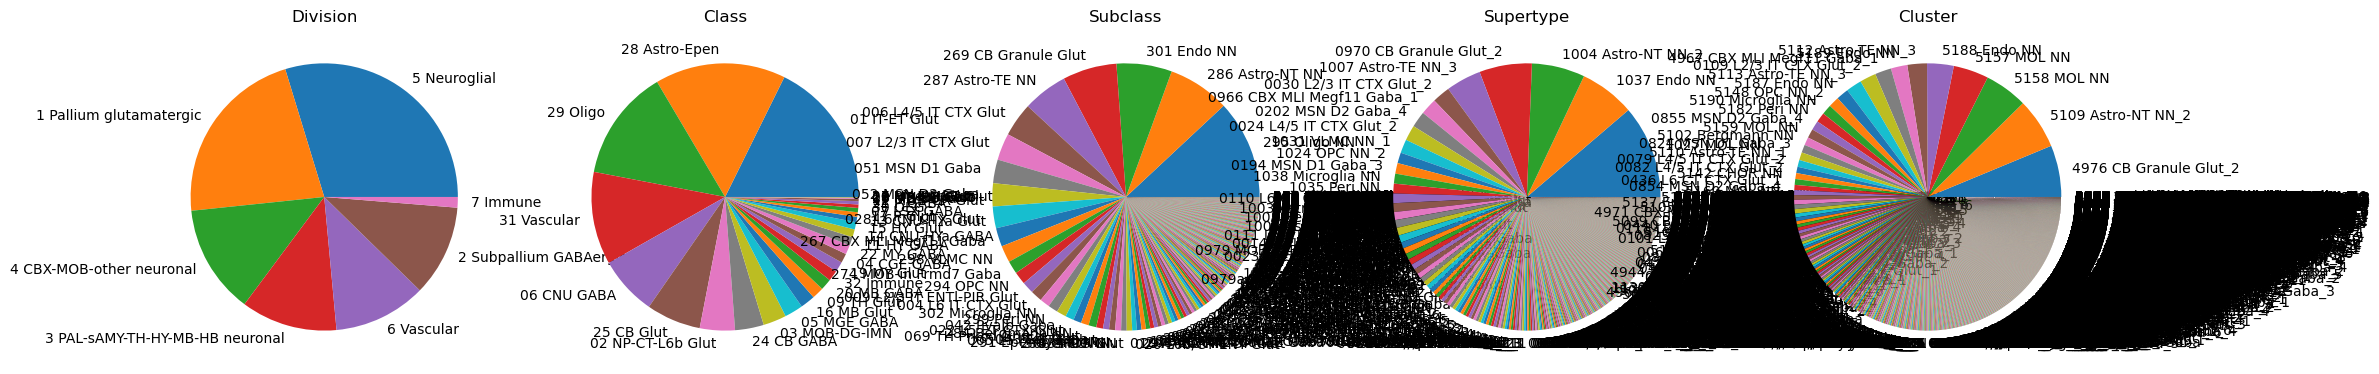

In [20]:
fig, axs = plt.subplots(1, 5, figsize=(25,5))

categories = ['division', 'class', 'subclass', 'supertype', 'cluster']

for i, category in enumerate(categories):
    counts = adata.obs[category].value_counts()
    axs[i].pie(counts, labels = counts.index)
    axs[i].set_title(category.capitalize())

plt.show()


In [21]:
import pandas as pd
pd.DataFrame(adata.obs['brain_section_label'].unique())

,0
0,C57BL6J-638850.01
1,C57BL6J-638850.05
2,C57BL6J-638850.10
3,C57BL6J-638850.14
4,C57BL6J-638850.18
5,C57BL6J-638850.26
6,C57BL6J-638850.30
7,C57BL6J-638850.35
8,C57BL6J-638850.39
9,C57BL6J-638850.44


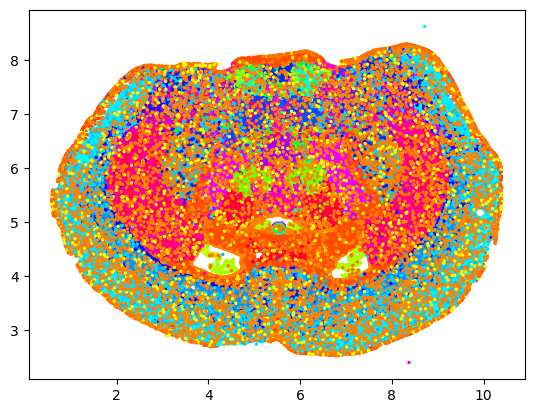

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

ix = adata.obs['Slice']=='C57BL6J-638850.44'

# Create a color palette for the unique categories in 'subclass'
palette = sns.color_palette('hsv', len(adata.obs['subclass'].unique()))

# Create a dictionary mapping each category to a color
color_map = dict(zip(adata.obs['subclass'].unique(), palette))

# Map the 'subclass' column to the corresponding color
subclass = adata.obs['subclass']
colors = [color_map[i] for i in subclass[ix]]

# Use the 'colors' variable for the color argument in the scatter plot
plt.scatter(adata.obs['x'][ix], adata.obs['y'][ix], s=2, c=colors)


In [67]:
adata.var.head(20)

,gene_symbol,transcript_identifier
gene_identifier,,
ENSMUSG00000026778,Prkcq,ENSMUST00000028118
ENSMUSG00000026837,Col5a1,ENSMUST00000028280
ENSMUSG00000001985,Grik3,ENSMUST00000030676
ENSMUSG00000039323,Igfbp2,ENSMUST00000047328
ENSMUSG00000048387,Osr1,ENSMUST00000057021
ENSMUSG00000027849,Syt6,ENSMUST00000090697
ENSMUSG00000033063,Cntnap3,ENSMUST00000091554
ENSMUSG00000030226,Lmo3,ENSMUST00000162772
ENSMUSG00000020902,Ntn1,ENSMUST00000021284


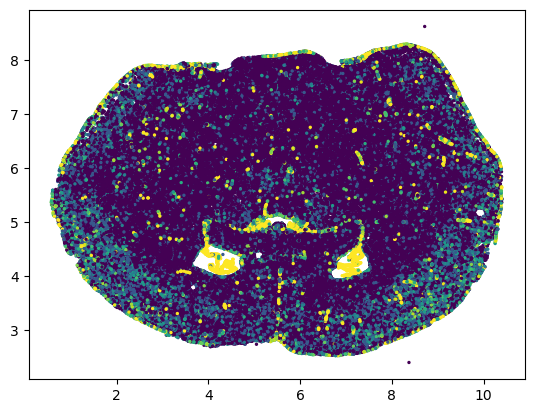

In [65]:
# Use the 'colors' variable for the color argument in the scatter plot
import numpy as np
g = adata.X[:,adata.var['gene_symbol'] == 'Igfbp2'].toarray()
lg = np.log10(g[ix]+1)

vmin = np.percentile(lg, 2.5)
vmax = np.percentile(lg, 97.5)
plt.scatter(adata.obs['x'][ix], adata.obs['y'][ix], s=2, c=lg, vmin=vmin, vmax=vmax)


In [71]:
xy=np.vstack((adata.obs['x'][ix],adata.obs['y'][ix])).T
from sklearn.neighbors import NearestNeighbors

k = 5  # or any other number you prefer
nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(xy)
distances, indices = nbrs.kneighbors(xy)



In [72]:
distances[:5,:]

array([[0.        , 0.01479071, 0.02321072, 0.02844803, 0.03173425],
       [0.        , 0.01934617, 0.02672512, 0.03629833, 0.04020498],
       [0.        , 0.01495001, 0.01689408, 0.01709908, 0.01765879],
       [0.        , 0.00903885, 0.01249573, 0.0147742 , 0.0187216 ],
       [0.        , 0.00848225, 0.01794958, 0.01887197, 0.02016978]])

In [73]:
indices[:5,:]

array([[     0,  28734,  55168,  90298, 107881],
       [     1, 100876,   6298,  94919,  51125],
       [     2, 101512, 101490,  95250,  95305],
       [     3,  11623,  37937,  22697,  85087],
       [     4,  94056,  92571, 101061,  92898]])